# Visualizing SNP frequencies at a single timepoint

Date: 2019-08-01

- Look at the frequency of each SNP in each ferret at a single timepoints 
- Using VCF files containing intersection SNPs that have had their frequencies averaged. 
- These SNPs were generated with the `Sniffles` pipeline 


In [197]:
pwd

'/Users/katbraun/Desktop'

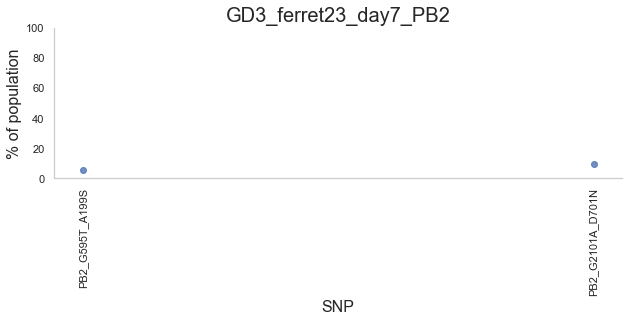

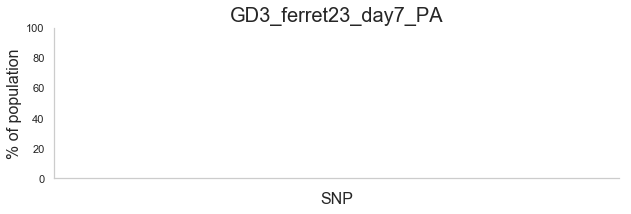

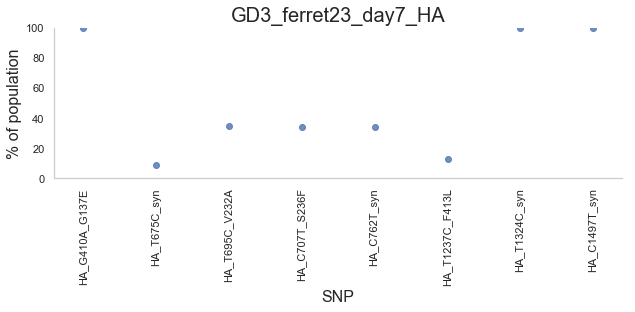

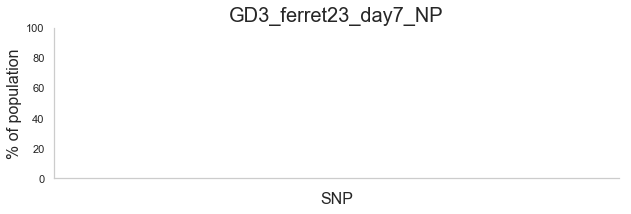

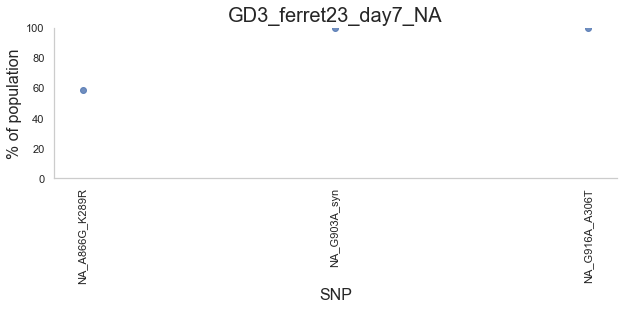

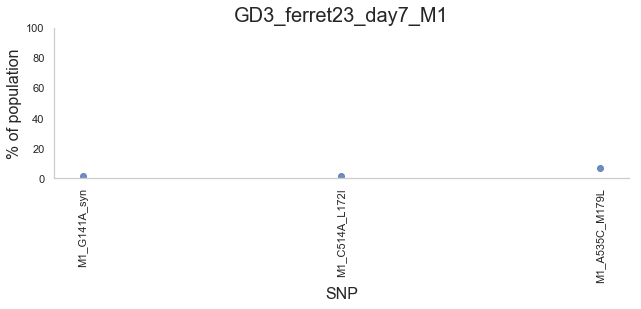

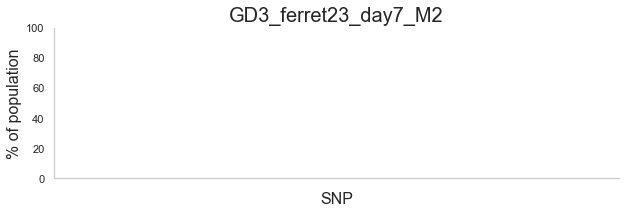

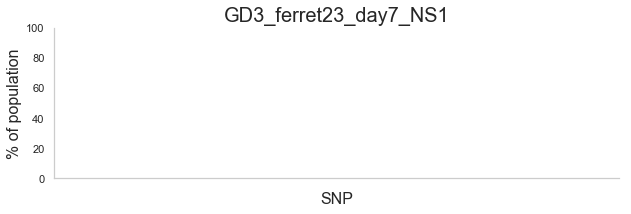

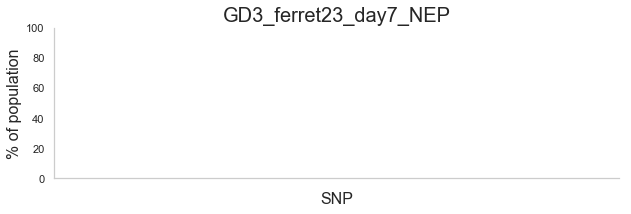

In [4]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns
import os
import seaborn as sns; sns.set()
from matplotlib import pyplot
import matplotlib.pyplot as plt

# modify the VCF file into a CSV file so I can load it easily into a Pandas dataframe

sample = 'GD3_ferret23_day7'

# os.rename('/Users/katbraun/Documents/research/kat_braun/projects/H7N9_transmission-bottlenecks/data_derived/analysis/SNPs/' + sample + '/' + sample + '_averaged.annotated_vcf', '/Users/katbraun/Documents/research/kat_braun/projects/H7N9_transmission-bottlenecks/data_derived/analysis/SNPs/' + sample + '/' + sample + '_averaged.annotated_vcf.csv')

# load CSV into Pandas dataframe 

DF = pd.read_csv(
    filepath_or_buffer='/Users/katbraun/Documents/research/kat_braun/projects/H7N9_transmission-bottlenecks/data_derived/analysis/SNPs/' + sample + '/' + sample + '_averaged.annotated_vcf.csv',
    header=0,
    sep='\t', 
    low_memory=False,
    )

# drop columns that aren't needed
DF = DF.drop(['#CHROM', 'ID', 'QUAL', 'FILTER', 'INFO', 'FORMAT', sample], axis=1)

DF

# replace the period=synonymous with "syn" for clarity 
DF['AAchange'] = DF['AAchange'].replace({'.':'syn'})
DF['gene'] = DF['gene'].replace({'NA gene':'NA'})

# create new column with GENE_REF-POS-ALT = SNP
DF['SNP'] = DF['gene'] + '_' + DF['REF'] + DF['POS'].map(str) + DF['ALT'] + '_' + DF['AAchange']

# delete rows in the dataframe that contain "not in ORF" -- I don't need to track these SNPs
DF = DF[~DF['AAchange'].astype(str).str.contains('not in ORF')]

# reorder the columns to make a little more sense
DF = DF[['gene', 'POS', 'REF', 'ALT', 'FREQ', 'SNP']]

# # add a column to convert FREQ to % of the population 
DF['% of population'] = DF['FREQ'].multiply(100)
# DF

DF.to_csv('/Users/katbraun/Documents/research/kat_braun/projects/H7N9_transmission-bottlenecks/data_derived/analysis/SNPs/' + sample + '/' + sample + '_SNPs.csv', sep='\t')

# ALL SNPs within a single ferret 
# Phase DF into gene segments to facilitate plotting these SNPs

PB2 = DF[DF.gene == 'PB2']
# PB1 = DF[DF.gene == 'PB1']
PA = DF[DF.gene == 'PA']
HA = DF[DF.gene == 'HA']
NP = DF[DF.gene == 'NP']
NA = DF[DF.gene == 'NA']
M1 = DF[DF.gene == 'M1']
M2 = DF[DF.gene == 'M2']
NS1 = DF[DF.gene == 'NS1']
NEP = DF[DF.gene == 'NEP']

# plot 'SNP's on the x-axis and '% of population' along the y-axis 
sns.set_style("whitegrid", {'axes.grid' : False})
ax1 = sns.lmplot('SNP', '% of population', data=PB2, fit_reg=False, height=3, aspect=3)
ax1.set(ylim=(0,100))
plt.title(sample + '_PB2', fontsize=20)
plt.xlabel('SNP', fontsize=16)
plt.ylabel('% of population', fontsize=16)
ax1.set_xticklabels(PB2['SNP'], rotation=90)
ax1.savefig('/Users/katbraun/Documents/research/kat_braun/projects/H7N9_transmission-bottlenecks/data_derived/analysis/SNPs/' + sample + '/' + "SNPs_PB2.pdf")

# sns.set_style("whitegrid", {'axes.grid' : False})
# ax2 = sns.lmplot('SNP', '% of population', data=PB1, fit_reg=False, height=3, aspect=3)
# ax2.set(ylim=(0,100))
# plt.title(sample + '_PB1', fontsize=20)
# plt.xlabel('SNP', fontsize=16)
# plt.ylabel('% of population', fontsize=16)
# ax2.set_xticklabels(PB1['SNP'], rotation=90)
# ax2.savefig('/Users/katbraun/Documents/research/kat_braun/projects/H7N9_transmission-bottlenecks/data_derived/analysis/SNPs/' + sample + '/' + "SNPs_PB1.pdf")

sns.set_style("whitegrid", {'axes.grid' : False})
ax3 = sns.lmplot('SNP', '% of population', data=PA, fit_reg=False, height=3, aspect=3)
ax3.set(ylim=(0,100))
plt.title(sample + '_PA', fontsize=20)
plt.xlabel('SNP', fontsize=16)
plt.ylabel('% of population', fontsize=16)
ax3.set_xticklabels(PA['SNP'], rotation=90)
ax3.savefig('/Users/katbraun/Documents/research/kat_braun/projects/H7N9_transmission-bottlenecks/data_derived/analysis/SNPs/' + sample + '/' + "SNPs_PA.pdf")

sns.set_style("whitegrid", {'axes.grid' : False})
ax4 = sns.lmplot('SNP', '% of population', data=HA, fit_reg=False, height=3, aspect=3)
ax4.set(ylim=(0,100))
plt.title(sample + '_HA', fontsize=20)
plt.xlabel('SNP', fontsize=16)
plt.ylabel('% of population', fontsize=16)
ax4.set_xticklabels(HA['SNP'], rotation=90)
ax4.savefig('/Users/katbraun/Documents/research/kat_braun/projects/H7N9_transmission-bottlenecks/data_derived/analysis/SNPs/' + sample + '/' + "SNPs_HA.pdf")

sns.set_style("whitegrid", {'axes.grid' : False})
ax5 = sns.lmplot('SNP', '% of population', data=NP, fit_reg=False, height=3, aspect=3)
ax5.set(ylim=(0,100))
plt.title(sample + '_NP', fontsize=20)
plt.xlabel('SNP', fontsize=16)
plt.ylabel('% of population', fontsize=16)
ax5.set_xticklabels(NP['SNP'], rotation=90)
ax5.savefig('/Users/katbraun/Documents/research/kat_braun/projects/H7N9_transmission-bottlenecks/data_derived/analysis/SNPs/' + sample + '/' + "SNPs_NP.pdf")

sns.set_style("whitegrid", {'axes.grid' : False})
ax6 = sns.lmplot('SNP', '% of population', data=NA, fit_reg=False, height=3, aspect=3)
ax6.set(ylim=(0,100))
plt.title(sample + '_NA', fontsize=20)
plt.xlabel('SNP', fontsize=16)
plt.ylabel('% of population', fontsize=16)
ax6.set_xticklabels(NA['SNP'], rotation=90)
ax6.savefig('/Users/katbraun/Documents/research/kat_braun/projects/H7N9_transmission-bottlenecks/data_derived/analysis/SNPs/' + sample + '/' + "SNPs_NA.pdf")

sns.set_style("whitegrid", {'axes.grid' : False})
ax7 = sns.lmplot('SNP', '% of population', data=M1, fit_reg=False, height=3, aspect=3)
ax7.set(ylim=(0,100))
plt.title(sample + '_M1', fontsize=20)
plt.xlabel('SNP', fontsize=16)
plt.ylabel('% of population', fontsize=16)
ax7.set_xticklabels(M1['SNP'], rotation=90)
ax7.savefig('/Users/katbraun/Documents/research/kat_braun/projects/H7N9_transmission-bottlenecks/data_derived/analysis/SNPs/' + sample + '/' + "SNPs_M1.pdf")

sns.set_style("whitegrid", {'axes.grid' : False})
ax8 = sns.lmplot('SNP', '% of population', data=M2, fit_reg=False, height=3, aspect=3)
ax8.set(ylim=(0,100))
plt.title(sample + '_M2', fontsize=20)
plt.xlabel('SNP', fontsize=16)
plt.ylabel('% of population', fontsize=16)
ax8.set_xticklabels(M2['SNP'], rotation=90)
ax8.savefig('/Users/katbraun/Documents/research/kat_braun/projects/H7N9_transmission-bottlenecks/data_derived/analysis/SNPs/' + sample + '/' + "SNPs_M2.pdf")

sns.set_style("whitegrid", {'axes.grid' : False})
ax9 = sns.lmplot('SNP', '% of population', data=NS1, fit_reg=False, height=3, aspect=3)
ax9.set(ylim=(0,100))
plt.title(sample + '_NS1', fontsize=20)
plt.xlabel('SNP', fontsize=16)
plt.ylabel('% of population', fontsize=16)
ax9.set_xticklabels(NS1['SNP'], rotation=90)
ax9.savefig('/Users/katbraun/Documents/research/kat_braun/projects/H7N9_transmission-bottlenecks/data_derived/analysis/SNPs/' + sample + '/' + "SNPs_NS1.pdf")

sns.set_style("whitegrid", {'axes.grid' : False})
ax10 = sns.lmplot('SNP', '% of population', data=NEP, fit_reg=False, height=3, aspect=3)
ax10.set(ylim=(0,100))
plt.title(sample + '_NEP', fontsize=20)
plt.xlabel('SNP', fontsize=16)
plt.ylabel('% of population', fontsize=16)
ax10.set_xticklabels(NEP['SNP'], rotation=90)
ax10.savefig('/Users/katbraun/Documents/research/kat_braun/projects/H7N9_transmission-bottlenecks/data_derived/analysis/SNPs/' + sample + '/' + "SNPs_NEP.pdf")

In [ ]:
######### Everything below is code that can be used to convert the 
# non-annotated averaged VCF files into a pandas dataframe that can be used to plot SNP frequencies over time

# # load CSV into Pandas dataframe 

# sample = 'GD3_ferret1_day1'

# DF = pd.read_csv(
#     filepath_or_buffer='/Users/katbraun/Documents/research/kat_braun/projects/H7N9_transmission-bottlenecks/data_derived/analysis/SNPs/GD3_ferret1_day1_averaged.csv',
#     header=0,
#     sep='\t', 
#     low_memory=False,
#     )

# # modify the Pandas dataframe, remove leading string before gene name in column 1
# DF['GENE'] = DF['#CHROM'].str[25:]

# # # modify Pandas dataframe, modify the INFO column to retain ADP (number of reads supporting the SNP) only 
# DF['ADP'] = DF['INFO'].map(lambda x: x.lstrip('ADP='))
# DF['ADP'] = DF['ADP'].map(lambda x: str(x)[:-22])

# # drop columns we don't need 
# DF = DF.drop(['#CHROM', 'ID', 'QUAL', 'FILTER', 'FORMAT', 'INFO'], axis=1)

# # split frequency string at colons and make a new dataframe with SNP frequencies
# DF_freq = DF[sample].str.split(":", n=9, expand=True)
# DF_freq = DF_freq.drop([0,1,2,3,4,5,7,8,9], axis=1)

# # merge dataframes, rename frequency column, and reorder columns
# DF = pd.concat([DF, DF_freq], axis=1, sort=False)
# DF = DF.drop([sample], axis=1)
# DF.rename(columns={6:'FREQ'}, inplace=True)
# DF = GD3_ferret1_day1[['GENE', 'REF', 'POS', 'ALT', 'FREQ', 'ADP']]

# # create new column with GENE_REF-POS-ALT = SNP
# DF['SNP'] = DF['GENE'] + '_' + DF['REF'] + DF['POS'].map(str) + DF['ALT']

# DF
# ########